In [4]:
import os
# 查看当前路径
print(os.getcwd())
# 切换到上一级
os.chdir("..")
print(os.getcwd())

/home/zhangy/python_project/mms/my-test
/home/zhangy/python_project/mms


In [8]:
group_models=((0,), (1, 16), (2, 38, 59), (4, 33, 38), (5, 25), (7, 17), (7, 53), (8, 9, 71), (11, 51, 63), (13, 35), (14, 15, 29), (14, 23, 62), (16, 31), (16, 33, 58, 70), (17, 25), (17, 25), (17, 55), (18,), (19, 64), (20, 21, 41), (22, 45, 69), (24,), (26, 32, 65), (26, 41, 50), (27, 44, 53), (28, 34, 47, 57), (33, 40, 56), (34, 37), (42,), (43, 52), (46, 49), (58, 61))

# 计算group_models中所有的模型数量
total_models = sum([len(group) for group in group_models])
print(total_models)
print(len(group_models))

76
32


In [7]:
# 简单定义ParallelConfig
class ParallelConfig:
    def __init__(self, dp, op, pp):
        self.dp = dp
        self.op = op
        self.pp = pp
group_configs=(ParallelConfig(dp=1, op=1, pp=1), ParallelConfig(dp=1, op=1, pp=1), ParallelConfig(dp=1, op=1, pp=1), ParallelConfig(dp=1, op=1, pp=1), ParallelConfig(dp=1, op=1, pp=1), ParallelConfig(dp=1, op=1, pp=1), ParallelConfig(dp=1, op=1, pp=1), ParallelConfig(dp=1, op=1, pp=1), ParallelConfig(dp=1, op=1, pp=1), ParallelConfig(dp=1, op=1, pp=1), ParallelConfig(dp=1, op=1, pp=1), ParallelConfig(dp=1, op=1, pp=1), ParallelConfig(dp=1, op=1, pp=1), ParallelConfig(dp=1, op=1, pp=1), ParallelConfig(dp=1, op=1, pp=1), ParallelConfig(dp=1, op=1, pp=1), ParallelConfig(dp=1, op=1, pp=1), ParallelConfig(dp=1, op=1, pp=1), ParallelConfig(dp=1, op=1, pp=1), ParallelConfig(dp=1, op=1, pp=1), ParallelConfig(dp=1, op=1, pp=1), ParallelConfig(dp=1, op=1, pp=1), ParallelConfig(dp=1, op=1, pp=1), ParallelConfig(dp=1, op=1, pp=1), ParallelConfig(dp=1, op=1, pp=1), ParallelConfig(dp=1, op=1, pp=1), ParallelConfig(dp=1, op=1, pp=1), ParallelConfig(dp=1, op=1, pp=1), ParallelConfig(dp=1, op=1, pp=1), ParallelConfig(dp=1, op=1, pp=1), ParallelConfig(dp=1, op=1, pp=1), ParallelConfig(dp=1, op=1, pp=1))
len(group_configs)

32

score_mixed: 0.893, score_separate: 0.910
placement solution: ModelPlacement(group_configs=[ParallelConfig(dp=1, op=4, pp=1), ParallelConfig(dp=1, op=4, pp=1), ParallelConfig(dp=1, op=1, pp=8), ParallelConfig(dp=1, op=1, pp=8), ParallelConfig(dp=1, op=1, pp=8)], group_models=[[0, 18, 48, 60], [12, 24, 42, 54], [1, 4, 8, 9, 11, 14, 29, 33, 35, 37, 39, 41, 43, 44, 50, 52, 53, 61, 71], [2, 3, 7, 10, 13, 15, 16, 17, 21, 27, 28, 31, 38, 40, 45, 46, 51, 59, 63, 65, 70], [5, 16, 19, 20, 22, 23, 25, 26, 32, 34, 47, 49, 55, 56, 57, 58, 62, 64, 69]])
debug info: {}
solver time: 146.84 s

In [43]:
# 推导模型的放置方案id2model
model_set = ["bert-6.7b", "moe-5.3b", "bert-2.6b", "moe-2.4b", "bert-1.3b", "moe-1.3b"]
def id2model(int):
    return model_set[int % 6]
group_models=[[0, 18, 48, 60], [12, 24, 42, 54], [1, 4, 8, 9, 11, 14, 29, 33, 35, 37, 39, 41, 43, 44, 50, 52, 53, 61, 71], [2, 3, 7, 10, 13, 15, 16, 17, 21, 27, 28, 31, 38, 40, 45, 46, 51, 59, 63, 65, 70], [5, 16, 19, 20, 22, 23, 25, 26, 32, 34, 47, 49, 55, 56, 57, 58, 62, 64, 69]]
for group in group_models:
    print([id2model(i) for i in group])

['bert-6.7b', 'bert-6.7b', 'bert-6.7b', 'bert-6.7b']
['bert-6.7b', 'bert-6.7b', 'bert-6.7b', 'bert-6.7b']
['moe-5.3b', 'bert-1.3b', 'bert-2.6b', 'moe-2.4b', 'moe-1.3b', 'bert-2.6b', 'moe-1.3b', 'moe-2.4b', 'moe-1.3b', 'moe-5.3b', 'moe-2.4b', 'moe-1.3b', 'moe-5.3b', 'bert-2.6b', 'bert-2.6b', 'bert-1.3b', 'moe-1.3b', 'moe-5.3b', 'moe-1.3b']
['bert-2.6b', 'moe-2.4b', 'moe-5.3b', 'bert-1.3b', 'moe-5.3b', 'moe-2.4b', 'bert-1.3b', 'moe-1.3b', 'moe-2.4b', 'moe-2.4b', 'bert-1.3b', 'moe-5.3b', 'bert-2.6b', 'bert-1.3b', 'moe-2.4b', 'bert-1.3b', 'moe-2.4b', 'moe-1.3b', 'moe-2.4b', 'moe-1.3b', 'bert-1.3b']
['moe-1.3b', 'bert-1.3b', 'moe-5.3b', 'bert-2.6b', 'bert-1.3b', 'moe-1.3b', 'moe-5.3b', 'bert-2.6b', 'bert-2.6b', 'bert-1.3b', 'moe-1.3b', 'moe-5.3b', 'moe-5.3b', 'bert-2.6b', 'moe-2.4b', 'bert-1.3b', 'bert-2.6b', 'bert-1.3b', 'moe-2.4b']


In [6]:
model_set = ["bert-6.7b", "moe-5.3b", "bert-2.6b", "moe-2.4b", "bert-1.3b", "moe-1.3b"]
fixed_num_modelset = 12
model_types = model_set * fixed_num_modelset
model_names = sum([[f"{model_type}-{i}" for model_type in model_set] for i in range(fixed_num_modelset)], [])
group_models=[[0, 18, 48, 60], [12, 24, 42, 54], [1, 4, 8, 9, 11, 14, 29, 33, 35, 37, 39, 41, 43, 44, 50, 52, 53, 61, 71], [2, 3, 7, 10, 13, 15, 16, 17, 21, 27, 28, 31, 38, 40, 45, 46, 51, 59, 63, 65, 70], [5, 16, 19, 20, 22, 23, 25, 26, 32, 34, 47, 49, 55, 56, 57, 58, 62, 64, 69]]
for group in group_models:
    print([model_names[i] for i in group])

['bert-6.7b-0', 'bert-6.7b-3', 'bert-6.7b-8', 'bert-6.7b-10']
['bert-6.7b-2', 'bert-6.7b-4', 'bert-6.7b-7', 'bert-6.7b-9']
['moe-5.3b-0', 'bert-1.3b-0', 'bert-2.6b-1', 'moe-2.4b-1', 'moe-1.3b-1', 'bert-2.6b-2', 'moe-1.3b-4', 'moe-2.4b-5', 'moe-1.3b-5', 'moe-5.3b-6', 'moe-2.4b-6', 'moe-1.3b-6', 'moe-5.3b-7', 'bert-2.6b-7', 'bert-2.6b-8', 'bert-1.3b-8', 'moe-1.3b-8', 'moe-5.3b-10', 'moe-1.3b-11']
['bert-2.6b-0', 'moe-2.4b-0', 'moe-5.3b-1', 'bert-1.3b-1', 'moe-5.3b-2', 'moe-2.4b-2', 'bert-1.3b-2', 'moe-1.3b-2', 'moe-2.4b-3', 'moe-2.4b-4', 'bert-1.3b-4', 'moe-5.3b-5', 'bert-2.6b-6', 'bert-1.3b-6', 'moe-2.4b-7', 'bert-1.3b-7', 'moe-2.4b-8', 'moe-1.3b-9', 'moe-2.4b-10', 'moe-1.3b-10', 'bert-1.3b-11']
['moe-1.3b-0', 'bert-1.3b-2', 'moe-5.3b-3', 'bert-2.6b-3', 'bert-1.3b-3', 'moe-1.3b-3', 'moe-5.3b-4', 'bert-2.6b-4', 'bert-2.6b-5', 'bert-1.3b-5', 'moe-1.3b-7', 'moe-5.3b-8', 'moe-5.3b-9', 'bert-2.6b-9', 'moe-2.4b-9', 'bert-1.3b-9', 'bert-2.6b-10', 'bert-1.3b-10', 'moe-2.4b-11']


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

def draw_plot(*lists, xlabel='X-Axis', ylabel='Y-Axis', colors=None, 
              title='Line Plot', labels=None, xlim=None, ylim=None, save_path=None):
    """
    绘制折线图。
    
    参数:
    *lists: 可变数量的列表，每个列表代表一条折线
    xlabel: X轴的标签 (默认值 'X-Axis')
    ylabel: Y轴的标签 (默认值 'Y-Axis')
    title: 图表标题 (默认值 'Line Plot')
    labels: 每条折线的名称 (列表类型，默认为 None)
    xlim: x轴的范围，元组类型 (默认值 None)
    ylim: y轴的范围，元组类型 (默认值 None)
    save_path: 如果提供路径，将图表保存到指定文件路径 (默认值 None)
    """
    
    # 使用Seaborn的风格
    sns.set(style="whitegrid")  # 设置背景样式为白色网格
    plt.figure(figsize=(10, 6), dpi=100)  # 设置图表大小和分辨率
    
    # 如果没有传递labels，则使用默认的Line 1, Line 2...
    if labels is None:
        labels = [f'Line {i+1}' for i in range(len(lists))]
    
    # 绘制每一条折线
    for i, data in enumerate(lists):
        plt.plot(data, label=labels[i], color=colors[i] if colors else None, linewidth=2.0, marker='o', markersize=6)
    
    # 设置标题和轴标签，字体大小
    plt.title(title, fontsize=18, pad=15)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    
    # 设置x轴和y轴的范围
    if xlim:
        plt.xlim(xlim)
    if ylim:
        plt.ylim(ylim)
    
    # 显示图例，图例字体大小，位置设置为图表外侧右上角
    plt.legend(loc='upper left', fontsize=12)
    
    # 设置刻度大小
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    # 调整子图周围的空白
    plt.tight_layout()

    # 保存图像 (如果指定路径)
    if save_path:
        plt.savefig(save_path, dpi=300)  # 以高分辨率保存
        print(f"图表已保存至 {save_path}")
    
    # 显示图表
    plt.show()

# 示例调用
# draw_plot([1, 2, 3, 4], [4, 3, 2, 1], labels=['Dataset 1', 'Dataset 2'], xlabel='X-Axis', ylabel='Y-Axis', 
#           title='Custom Line Plot', xlim=(0, 5), ylim=(0, 5))


In [1]:
# 读取/home/zhangy/python_project/mms/osdi23_artifact/sec6_2_data/azure_v1_mixed_single_model_dir文件夹里的文件
import os

# 定义文件路径
file_path = "/home/zhangy/python_project/mms/osdi23_artifact/sec6_2_data/azure_v1_mixed_single_model_dir"
# 获取文件夹中的所有文件
files = os.listdir(file_path)

# save_path
save_path = "/home/zhangy/python_project/mms/osdi23_artifact/sec6_2_data/azure_v1_mixed_single_model_dir/plot"

# 记录集群在整个过程中的请求数、返回请求数、丢弃请求数、模型是否在运行
total_received_requests = []
total_returned_requests = []
total_dropped_requests = []
total_is_running = []

for file_name in files:
    if not file_name.endswith('.tsv'):
        continue
    # 模型名称为文件名
    model_name = file_name[:-4]
    model_is_running = []
    model_received_requests = []
    model_returned_requests = []
    model_dropped_requests = []

    # 读取文件每一行的信息到model_is_running, model_received_requests, model_returned_requests, model_dropped_requests
    full_path = os.path.join(file_path, file_name)
    print(full_path)
    with open(full_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            model_is_running.append(line.split('\t')[1].strip().lower() == 'true')
            model_received_requests.append(int(line.split('\t')[2]))
            model_returned_requests.append(int(line.split('\t')[3]))
            model_dropped_requests.append(int(line.split('\t')[4]))
    
    total_is_running.append(model_is_running)
    total_received_requests.append(model_received_requests)
    total_returned_requests.append(model_returned_requests)
    total_dropped_requests.append(model_dropped_requests)

    # 画出model_is_running, model_received_requests, model_returned_requests, model_dropped_requests的折线图
    import matplotlib.pyplot as plt

    # 将model_is_running, model_received_requests, model_returned_requests, model_dropped_requests转换为整数
    model_is_running = [int(x) for x in model_is_running]
    model_received_requests = [int(x) for x in model_received_requests]
    model_returned_requests = [int(x) for x in model_returned_requests]
    model_dropped_requests = [int(x) for x in model_dropped_requests]

    # 画出model_is_running, model_received_requests, model_returned_requests, model_dropped_requests的折线图
    plt.figure(figsize=(12, 6))
    plt.plot(model_received_requests, label='model_received_requests', color='orange')
    plt.plot(model_returned_requests, label='model_returned_requests', color='green')
    plt.plot(model_dropped_requests, label='model_dropped_requests', color='red')
    # 横坐标是时间，从0到3600，纵坐标是请求数
    plt.xlabel('Time(0.1s)')
    plt.ylabel('Requests')

    plt.title(model_name)
    plt.legend()
    plt.savefig(save_path + '/' + model_name + '.png')
    plt.close()

# 将model_is_running等沿着dim=1的方向求和
total_is_running = [sum(x) for x in zip(*total_is_running)]
total_received_requests = [sum(x) for x in zip(*total_received_requests)]
total_returned_requests = [sum(x) for x in zip(*total_returned_requests)]
total_dropped_requests = [sum(x) for x in zip(*total_dropped_requests)]


/home/zhangy/python_project/mms/osdi23_artifact/sec6_2_data/azure_v1_mixed_single_model_dir/bert-1.3b-1.tsv
/home/zhangy/python_project/mms/osdi23_artifact/sec6_2_data/azure_v1_mixed_single_model_dir/moe-1.3b-4.tsv
/home/zhangy/python_project/mms/osdi23_artifact/sec6_2_data/azure_v1_mixed_single_model_dir/moe-5.3b-7.tsv
/home/zhangy/python_project/mms/osdi23_artifact/sec6_2_data/azure_v1_mixed_single_model_dir/bert-6.7b-1.tsv
/home/zhangy/python_project/mms/osdi23_artifact/sec6_2_data/azure_v1_mixed_single_model_dir/moe-5.3b-1.tsv
/home/zhangy/python_project/mms/osdi23_artifact/sec6_2_data/azure_v1_mixed_single_model_dir/moe-2.4b-6.tsv
/home/zhangy/python_project/mms/osdi23_artifact/sec6_2_data/azure_v1_mixed_single_model_dir/bert-2.6b-2.tsv
/home/zhangy/python_project/mms/osdi23_artifact/sec6_2_data/azure_v1_mixed_single_model_dir/moe-1.3b-8.tsv
/home/zhangy/python_project/mms/osdi23_artifact/sec6_2_data/azure_v1_mixed_single_model_dir/bert-1.3b-4.tsv
/home/zhangy/python_project/mms/o

In [15]:
# 对列表进行平均值平滑
def smooth_list(l, interval=5):
    """
    对列表进行平均值平滑。
    
    参数:
    l: 输入的列表
    interval: 平滑间隔 (默认值 5)
    
    返回:
    平滑后的列表
    """
    return [sum(l[i:i+interval]) / interval for i in range(0, len(l), interval)]

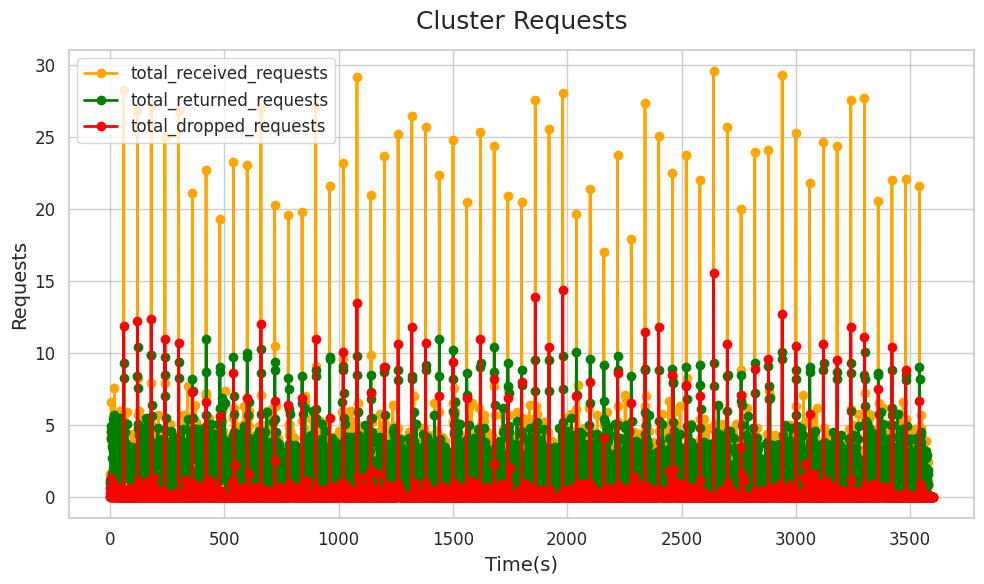

In [27]:
total_received_requests_smooth = smooth_list(total_received_requests, interval=10)
total_returned_requests_smooth = smooth_list(total_returned_requests, interval=10)
total_dropped_requests_smooth = smooth_list(total_dropped_requests, interval=10)

draw_plot(total_received_requests_smooth, total_returned_requests_smooth, total_dropped_requests_smooth, 
          labels=['total_received_requests', 'total_returned_requests', 'total_dropped_requests'],
          colors=['orange', 'green', 'red'],
          xlabel='Time(s)', ylabel='Requests', title='Cluster Requests')

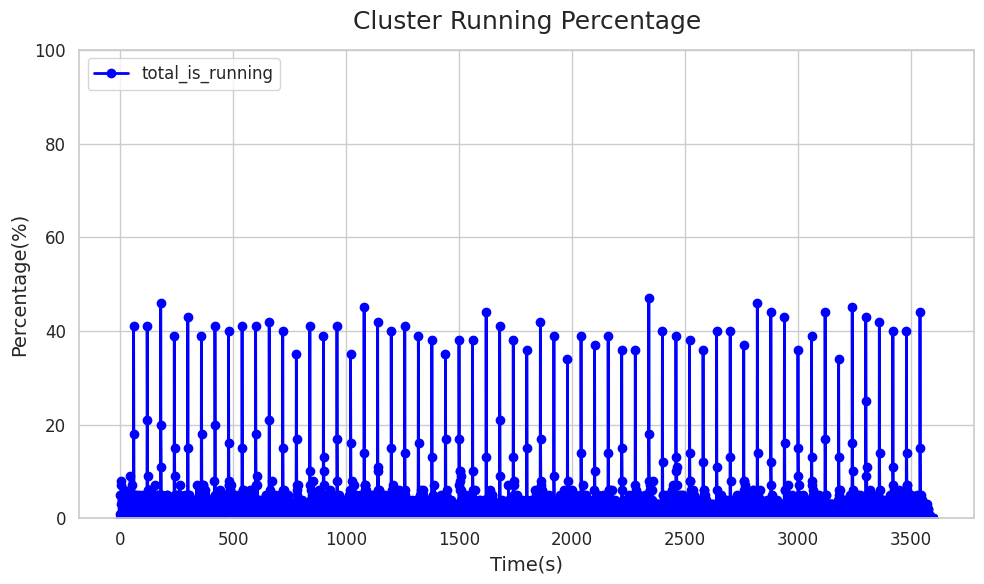

In [39]:
new_total_is_running = smooth_list(total_is_running, interval=10)
new_total_is_running = [int(x / 72 * 100) for x in new_total_is_running]
draw_plot(new_total_is_running, labels=['total_is_running'], colors=['blue'], xlabel='Time(s)', ylabel='Percentage(%)', 
          ylim=(0, 100), title='Cluster Running Percentage')

_SINGLE_MODEL_DATA_HEADS = ("exp_name", "num_models",
               "num_devices", "mem_budget", "total_rate", "rate_distribution",
               "arrival_process", "arrival_process_kwargs", "slo_scale", "duration",
               "policy_name", "placement", "goodput", "mode", 
               "model_name", "num_requests", "goodput", "throughput", "avg_latency", 
               "latency_std", "latency_p90", "latency_p99") 

In [2]:
file_path = "/home/zhangy/python_project/mms/osdi23_artifact/sec6_2_data/azure_v1_mixed_single_model.tsv"

# 读取文件
mixed_single_model_dict = {}
with open(file_path, 'r') as f:
    lines = f.readlines()
    for line in lines:
        model_name = line.split('\t')[14]
        num_requests = line.split('\t')[15]
        goodput = line.split('\t')[16]
        throughput = line.split('\t')[17]
        avg_latency = line.split('\t')[18]
        latency_std = line.split('\t')[19]
        latency_p90 = line.split('\t')[20]
        latency_p99 = line.split('\t')[21]
        if model_name not in mixed_single_model_dict:
            mixed_single_model_dict[model_name] = {}
        mixed_single_model_dict[model_name]["num_requests"] = num_requests
        mixed_single_model_dict[model_name]["goodput"] = goodput
        mixed_single_model_dict[model_name]["throughput"] = throughput
        mixed_single_model_dict[model_name]["avg_latency"] = avg_latency
        mixed_single_model_dict[model_name]["latency_std"] = latency_std
        mixed_single_model_dict[model_name]["latency_p90"] = latency_p90
        mixed_single_model_dict[model_name]["latency_p99"] = latency_p99
        print(model_name, num_requests, goodput, throughput, avg_latency, latency_std, latency_p90, latency_p99)

moe-5.3b-11 345 0.0 0 0.0 0.0 0 0

bert-6.7b-5 386 0.0 0 0.0 0.0 0 0

bert-2.6b-11 388 0.0 0 0.0 0.0 0 0

moe-2.4b-0 433 0.9053117782909931 0.11228212016626471 0.3629267610082379 0.17693470144470508 0.6630611588147985 0.8497419940142663

bert-1.3b-1 435 0.8206896551724138 0.10034299900493333 0.313020993664684 0.16590705570011244 0.6064275053561232 0.7363041831004011

moe-1.3b-9 451 0.8048780487804879 0.10544531866670902 0.30193182721121703 0.1413290258979769 0.5306923588168502 0.7248273470841937

moe-2.4b-6 461 0.8568329718004338 0.1133277087999092 0.36595895004267076 0.18722535580638153 0.7008031386849751 0.8448101893930016

bert-1.3b-11 503 0.8807157057654076 0.12560980067109087 0.2914326045070479 0.1418569842298685 0.5426496801558187 0.7160111465195769

bert-1.3b-0 520 0.8307692307692308 0.1222428925599423 0.32616575813485943 0.1688596203664656 0.6173268562879457 0.7469565531077933

moe-5.3b-9 530 0.9924528301886792 0.1477530618183382 0.43864766093326146 0.22646274220978482 0.849860

In [11]:
# 统计集群的goodput
num_requests_sum = 0
goodput_sum = 0
for model_name in mixed_single_model_dict:
    num_requests_sum += int(mixed_single_model_dict[model_name]["num_requests"])
    goodput_sum += float(mixed_single_model_dict[model_name]["goodput"]) * int(mixed_single_model_dict[model_name]["num_requests"])
print(goodput_sum / num_requests_sum)
print("num_requests_sum:", num_requests_sum, " goodput_sum:", goodput_sum, " goodput_avg:", goodput_sum / num_requests_sum)

0.9102372370756899
num_requests_sum: 92945  goodput_sum: 84602.0  goodput_avg: 0.9102372370756899


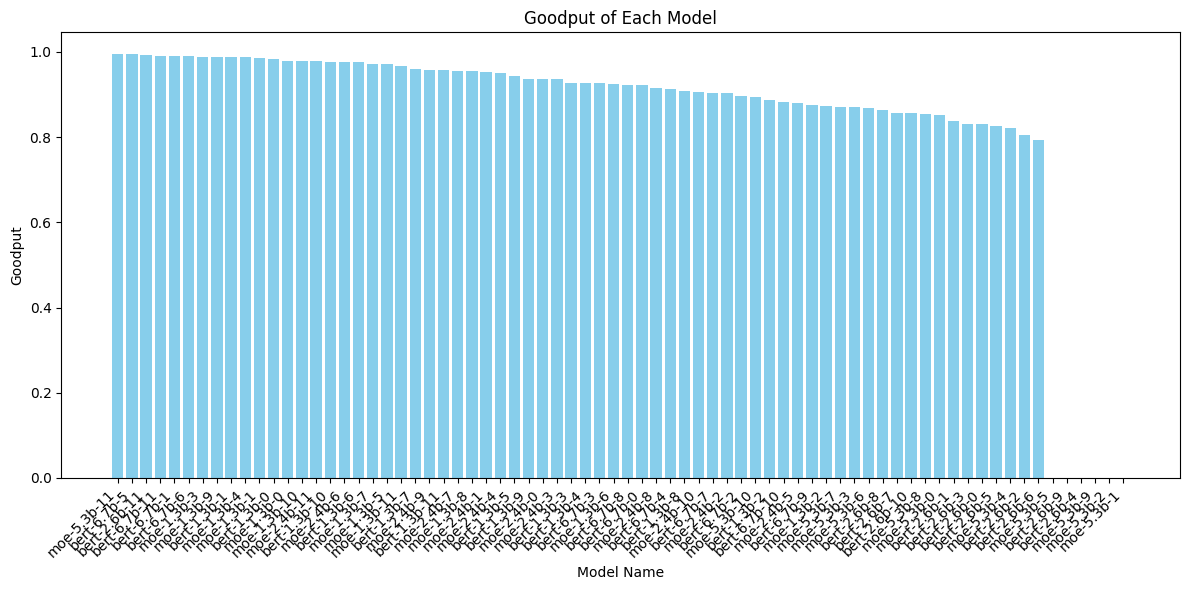

In [6]:
# 根据每个模型的goodput画出柱状图
import matplotlib.pyplot as plt
import numpy as np
# 提取模型名称和goodput，并排序
model_names = list(mixed_single_model_dict.keys())
goodputs = [float(mixed_single_model_dict[model]["goodput"]) for model in model_names]
# 对goodputs进行排序
goodputs_sorted = sorted(goodputs, reverse=True)
model_names_sorted = [model_names[i] for i in np.argsort(goodputs)]

# 创建柱状图
plt.figure(figsize=(12, 6))
plt.bar(model_names_sorted, goodputs_sorted, color='skyblue')
plt.xlabel('Model Name')
plt.ylabel('Goodput')
plt.title('Goodput of Each Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
plt.close()

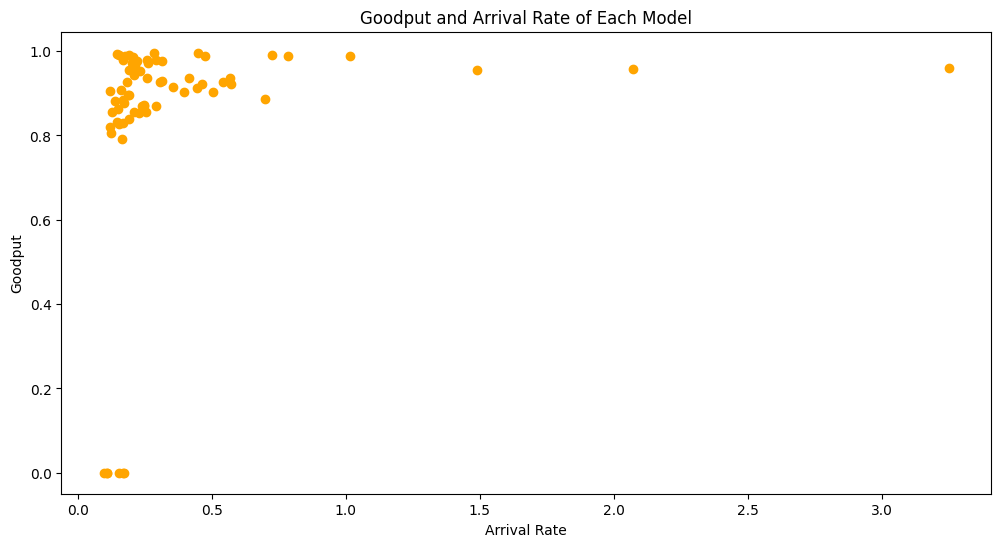

In [17]:
# 可视化出每个模型goodput和请求率的关系
# 提取模型名称和goodput，并排序
model_names = list(mixed_single_model_dict.keys())
goodputs = [float(mixed_single_model_dict[model]["goodput"]) for model in model_names]
arrival_rates = [int(mixed_single_model_dict[model]["num_requests"]) / 3600 for model in model_names]
# 创建散点图
plt.figure(figsize=(12, 6))
plt.scatter(arrival_rates, goodputs, color='orange')
plt.xlabel('Arrival Rate')
plt.ylabel('Goodput')
plt.title('Goodput and Arrival Rate of Each Model')
plt.show()
plt.close()

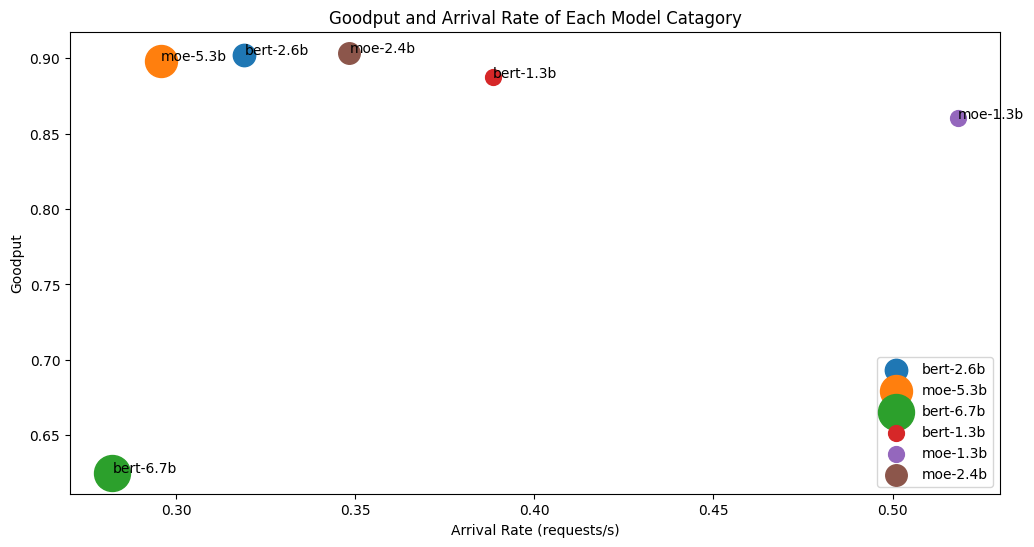

In [39]:
# 列出所有的模型名字
model_names = list(mixed_single_model_dict.keys())
# 在第二个"-"截断
model_names = ['-'.join(mn.split('-')[:2]) for mn in model_names]
unique_model_catagory = list(set(model_names))
# 提取每个模型名字里的数字为模型大小
model_sizes = {}
for model_name in unique_model_catagory:
    model_sizes[model_name] = float(model_name.split('-')[-1][:-1])

# 统计每个类别的模型数量、goodput、arrival_rate
model_catagory_count = {}
model_catagory_goodput = {}
model_catagory_arrival_rate = {}
for model_catagory in unique_model_catagory:
    model_catagory_count[model_catagory] = model_names.count(model_catagory)
    model_catagory_goodput[model_catagory] = 0
    model_catagory_arrival_rate[model_catagory] = 0
for model_name in mixed_single_model_dict:
    model_catagory = '-'.join(model_name.split('-')[:2])
    model_catagory_goodput[model_catagory] += float(mixed_single_model_dict[model_name]["goodput"])
    model_catagory_arrival_rate[model_catagory] += int(mixed_single_model_dict[model_name]["num_requests"]) / 3600

# 计算每个类别的goodput和arrival_rate
for model_catagory in unique_model_catagory:
    model_catagory_goodput[model_catagory] /= model_catagory_count[model_catagory]
    model_catagory_arrival_rate[model_catagory] /= model_catagory_count[model_catagory]

# 创建散点图,每个点旁边标明模型类别
plt.figure(figsize=(12, 6))
for model_catagory in unique_model_catagory:
    plt.scatter(model_catagory_arrival_rate[model_catagory], model_catagory_goodput[model_catagory], label=model_catagory, s=model_sizes[model_catagory] * 100)
    plt.text(model_catagory_arrival_rate[model_catagory], model_catagory_goodput[model_catagory], model_catagory)
plt.xlabel('Arrival Rate (requests/s)')
plt.ylabel('Goodput')
plt.title('Goodput and Arrival Rate of Each Model Catagory')
plt.legend()
plt.show()

In [40]:
unique_model_catagory

['bert-2.6b', 'moe-5.3b', 'bert-6.7b', 'bert-1.3b', 'moe-1.3b', 'moe-2.4b']

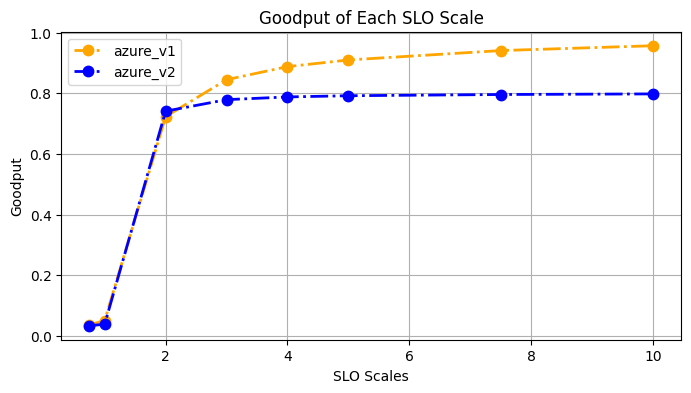

In [23]:
linestyles = ["solid", "dashed", "dashdot", "dotted"]
methodcolors = ["C2", "C1", "C0", "red"]

# 读取"/home/zhangy/python_project/mms/my-test/monitor_exp/res_monitor_general_model_cases.tsv"文件
file_path = "/home/zhangy/python_project/mms/my-test/monitor_exp/res_monitor_general_model_cases.tsv"

slo_scales_v1_ = []
goodput_list_v1_ = []
slo_scales_v2_ = []
goodput_list_v2_ = []
with open(file_path, 'r') as f:
    lines = f.readlines()
    for line in lines:
        if line.split('\t')[6] == "azure_v1":
            slo_scales_v1_.append(float(line.split('\t')[8]))
            goodput_list_v1_.append(float(line.split('\t')[-2]))
        elif line.split('\t')[6] == "azure_v2":
            slo_scales_v2_.append(float(line.split('\t')[8]))
            goodput_list_v2_.append(float(line.split('\t')[-2]))

# 画出goodput_list的折线图，x轴是slo_scales，y轴是goodput_list
import matplotlib.pyplot as plt
slo_scales_v1 = [x for x, _ in sorted(zip(slo_scales_v1_, goodput_list_v1_))][:-2]
goodput_list_v1 = [y for _, y in sorted(zip(slo_scales_v1_, goodput_list_v1_))][:-2]
slo_scales_v2 = [x for x, _ in sorted(zip(slo_scales_v2_, goodput_list_v2_))][:-2]
goodput_list_v2 = [y for _, y in sorted(zip(slo_scales_v2_, goodput_list_v2_))][:-2]

# 将曲线画在同一个图上
plt.figure(figsize=(8, 4))
plt.plot(slo_scales_v1, goodput_list_v1, label='azure_v1', color='orange', marker='.', linestyle='dashdot', linewidth=2, markersize=15)
plt.plot(slo_scales_v2, goodput_list_v2, label='azure_v2', color='blue', marker='.', linestyle='dashdot', linewidth=2, markersize=15)
plt.xlabel('SLO Scales')
plt.ylabel('Goodput')
plt.title('Goodput of Each SLO Scale')
plt.grid()
plt.legend()
plt.show()